# import annotations for genes

In [1]:
import pandas as pd

In [2]:
anno = pd.read_csv("./goa_human.gaf", sep="\t", 
                       comment="!", low_memory=False,
                       names=["DB","DBObjectID","Symbol","Qualifier",
 "GOID","DBReference","EvidenceCode","WithFrom",
 "Aspect","DBObjectName","DBObjectSynonym","DBObjectType",
 "Taxon","Date","AssignedBy","AnnotationExtension","GeneProductFormID"]
                      )

In [3]:
anno

,DB,DBObjectID,Symbol,Qualifier,GOID,DBReference,EvidenceCode,WithFrom,Aspect,DBObjectName,DBObjectSynonym,DBObjectType,Taxon,Date,AssignedBy,AnnotationExtension,GeneProductFormID
0,UniProtKB,A0A024RBG1,NUDT4B,enables,GO:0003723,GO_REF:0000043,IEA,UniProtKB-KW:KW-0694,F,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,protein,taxon:9606,20210417,UniProt,NaN,NaN
1,UniProtKB,A0A024RBG1,NUDT4B,enables,GO:0046872,GO_REF:0000043,IEA,UniProtKB-KW:KW-0479,F,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,protein,taxon:9606,20210417,UniProt,NaN,NaN
2,UniProtKB,A0A024RBG1,NUDT4B,enables,GO:0052840,GO_REF:0000003,IEA,EC:3.6.1.52,F,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,protein,taxon:9606,20210417,UniProt,NaN,NaN
3,UniProtKB,A0A024RBG1,NUDT4B,enables,GO:0052842,GO_REF:0000003,IEA,EC:3.6.1.52,F,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,protein,taxon:9606,20210417,UniProt,NaN,NaN
4,UniProtKB,A0A024RBG1,NUDT4B,located_in,GO:0005829,GO_REF:0000052,IDA,NaN,C,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,protein,taxon:9606,20161204,HPA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619342,UniProtKB,Q14061,COX17,involved_in,GO:0033617,PMID:21873635,IBA,PANTHER:PTN000423137|UniProtKB:Q14061|SGD:S000...,P,Cytochrome c oxidase copper chaperone,COX17,gene_product,taxon:9606,20170228,GO_Central,NaN,NaN
619343,UniProtKB,Q8NEZ3,WDR19,involved_in,GO:0035721,PMID:21873635,IBA,PANTHER:PTN000383096|WB:WBGene00001118|UniProt...,P,WD repeat-containing protein 19,WDR19|IFT144|KIAA1638,gene_product,taxon:9606,20170228,GO_Central,NaN,NaN
619344,UniProtKB,Q96KP1,EXOC2,part_of,GO:0000145,PMID:21873635,IBA,PANTHER:PTN000315823|UniProtKB:Q96KP1|FB:FBgn0...,C,Exocyst complex component 2,EXOC2|SEC5|SEC5L1,gene_product,taxon:9606,20200808,GO_Central,NaN,NaN
619345,UniProtKB,O43597,SPRY2,involved_in,GO:0046580,PMID:21873635,IBA,PANTHER:PTN000961788|MGI:MGI:1345139|MGI:MGI:1...,P,Protein sprouty homolog 2,SPRY2,gene_product,taxon:9606,20170420,GO_Central,NaN,NaN


# obonet tutorial: import and analyze the Gene Ontology in Python

This tutotial shows:

1. How to read the Gene Ontology OBO export into `networkx` using the [`obonet`](https://github.com/dhimmel/obonet) package.
2. Simple tasks you can do with the `networkx.MultiDiGraph` data structure.

In [2]:
import networkx
import obonet

### Read the Gene Ontology

Learn more about the Gene Ontology (GO) downloads [here](http://geneontology.org/page/download-ontology). Note how we can read the OBO file from a URL. `obonet.read_obo` automically detects whether it's passed a local path, URL, or open file. In addition, `obonet.read_obo` will automtically decompress files ending in `.gz`, `.bz2`, or `.gz`.

In [3]:
%%time
# url = 'http://purl.obolibrary.org/obo/go.obo'
graph = obonet.read_obo('./go.obo')

Wall time: 7.87 s


In [6]:
# Number of nodes
print(len(graph))
# Number of edges
print(graph.number_of_edges())
# Check if the ontology is a DAG
print(networkx.is_directed_acyclic_graph(graph))

43987
90185
False


In [11]:
graph.graph

{'typedefs': [{'id': 'ends_during',
   'name': 'ends_during',
   'namespace': 'external',
   'xref': ['RO:0002093']},
  {'id': 'happens_during',
   'name': 'happens during',
   'namespace': 'external',
   'xref': ['RO:0002092'],
   'is_transitive': 'true',
   'is_a': ['ends_during']},
  {'id': 'has_part',
   'name': 'has part',
   'namespace': 'external',
   'xref': ['BFO:0000051'],
   'is_transitive': 'true'},
  {'id': 'negatively_regulates',
   'name': 'negatively regulates',
   'namespace': 'external',
   'xref': ['RO:0002212'],
   'is_a': ['regulates']},
  {'id': 'occurs_in',
   'name': 'occurs in',
   'namespace': 'external',
   'xref': ['BFO:0000066'],
   'transitive_over': ['part_of']},
  {'id': 'part_of',
   'name': 'part of',
   'namespace': 'external',
   'xref': ['BFO:0000050'],
   'is_transitive': 'true',
   'inverse_of': ['has_part']},
  {'id': 'positively_regulates',
   'name': 'positively regulates',
   'namespace': 'external',
   'xref': ['RO:0002213'],
   'holds_over_c

### Create name mappings

Note that for some OBO ontologies, some nodes only have an id and not a name ([see issue](https://github.com/dhimmel/obonet/issues/11)).

In [7]:
id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}

In [8]:
len(name_to_id)

43987

In [9]:
list(name_to_id.keys())[:10]

['mitochondrion inheritance',
 'mitochondrial genome maintenance',
 'reproduction',
 'high-affinity zinc transmembrane transporter activity',
 'low-affinity zinc ion transmembrane transporter activity',
 'alpha-1,6-mannosyltransferase activity',
 'trans-hexaprenyltranstransferase activity',
 'vacuole inheritance',
 'single strand break repair',
 'single-stranded DNA endodeoxyribonuclease activity']

In [13]:
# Get the name for GO:0042552
id_to_name['GO:0000001']

'mitochondrion inheritance'

In [35]:
sorted(id_to_name[subterm] for subterm in networkx.descendants(graph, name_to_id['biological_process']))

[]

In [34]:
id_to_name['GO:0000001']

'mitochondrion inheritance'

In [17]:
name_to_id['biological_process']

'GO:0008150'

In [10]:
def read_gmt(gmt_file):
    with open(gmt_file, 'r') as f:
        id_to_genes = dict()
        for line in f.readlines():
            l = line.strip().split('\t')
            GOID = l[1]
            if len(l)>2:
                id_to_genes[GOID] = l[2:]
            else:
                id_to_genes[GOID] = []
    return(id_to_genes)

In [11]:
gs_gobp = read_gmt('GOBP_hs.gmt')

In [12]:
len(gs_gobp)

31532

In [17]:
name_to_len = {k:len(v) for k,v in gs_gobp.items()}

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
np.sum(np.array(list(name_to_len.values()))==0)

13717

(0, 100)

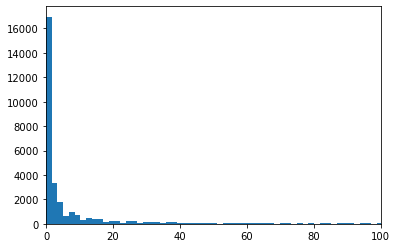

In [21]:
_ = plt.hist(list(name_to_len.values()),bins = 10000)
plt.xlim(0,100)

In [34]:
list(np.quantile([i for i in list(name_to_len.values())if i!=0], q = [0,0.25,0.5,0.75,0.95,1]))

[1.0, 2.0, 6.0, 27.0, 301.0, 17039.0]

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
nx.draw(G, with_labels=True)

In [3]:
from pyscenic.aucell import aucell

In [36]:
?aucell

In [37]:
from ctxcore.genesig import GeneSignature

In [38]:
?GeneSignature

In [42]:
gs_gobp_use = {k:v for k,v in gs_gobp.items() if len(v)>50 and len(v)<500}

In [43]:
len(gs_gobp_use)

2535

In [53]:
GOID

'GO:0000018'

In [56]:
from tqdm.notebook import tqdm
with open('./GOBP_hs_50tp500.gmt', 'a') as f:
    for GOID in tqdm(gs_gobp_use.keys()):
        line= id_to_name[GOID]+"\t"+GOID+"\t"+ "\t".join(gs_gobp_use[GOID])+"\n"
        f.write(line)

  0%|          | 0/2535 [00:00<?, ?it/s]

In [44]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context
import numpy as np
import matplotlib.pyplot as plt
import sys
import umap

In [46]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
# sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.settings.set_figure_params(vector_friendly=False)

scanpy==1.7.2 anndata==0.7.6 umap==0.5.0 numpy==1.19.5 scipy==1.7.0 pandas==1.2.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6 louvain==0.7.0


In [47]:
mtx = pd.read_table(index_col=0, 
                    filepath_or_buffer='E:/Github/HCL_scanpy/GSM3943046_Adult-Adipose1_dge.txt')
mtx.shape
anno = pd.read_csv(index_col=0, 
                   filepath_or_buffer='E:/Github/HCL_scanpy/Adult-Adipose1_rmbatchAnno.csv')
anno.shape

(1372, 13)

In [48]:
mtx_used = mtx.loc[:,anno.index]
adata = sc.AnnData(X = mtx_used.T, obs = anno)
adata

AnnData object with n_obs × n_vars = 1372 × 19917
    obs: 'Sample', 'Batch', 'Cell_id', 'Cluster_id', 'Ages', 'Development_stage', 'Method', 'Gender', 'Source', 'Biomaterial', 'Name', 'ident', 'Celltype'

In [57]:
signatures = GeneSignature.from_gmt('GOBP_hs_50tp500.gmt')

In [63]:
mtx_used.T.shape

(1372, 19917)

In [64]:
aucell(mtx_used.T, signatures,)

Regulon,regulation of DNA recombination,transition metal ion transport,autophagosome assembly,mitotic sister chromatid segregation,cell cycle checkpoint signaling,DNA damage checkpoint signaling,regulation of cyclin-dependent protein serine/threonine kinase activity,mitotic G1 phase,G1/S transition of mitotic cell cycle,G2/M transition of mitotic cell cycle,...,positive regulation of apoptotic signaling pathway,regulation of extrinsic apoptotic signaling pathway,negative regulation of extrinsic apoptotic signaling pathway,regulation of intrinsic apoptotic signaling pathway,negative regulation of intrinsic apoptotic signaling pathway,positive regulation of intrinsic apoptotic signaling pathway,negative regulation of chromosome organization,positive regulation of chromosome organization,regulation of cation channel activity,positive regulation of cation channel activity
Cell,,,,,,,,,,,,,,,,,,,,,
AAAACGCCATCTTTTAGG,0.0,0.037271,0.020156,0.025599,0.022751,0.023631,0.039260,0.034000,0.042582,0.025189,...,0.078983,0.067408,0.074805,0.073750,0.072336,0.071190,0.042303,0.052002,0.0,0.0
AAAACGCTTCTGGGACAT,0.0,0.070300,0.010353,0.023561,0.020921,0.019615,0.031978,0.038016,0.037507,0.013935,...,0.067058,0.045796,0.054062,0.076298,0.078874,0.080757,0.035532,0.021033,0.0,0.0
AAAACGTCGTAAGTATAC,0.0,0.060110,0.020739,0.019353,0.024880,0.026221,0.037091,0.027337,0.049527,0.027716,...,0.090696,0.069651,0.065140,0.104695,0.107687,0.112848,0.025027,0.030755,0.0,0.0
AAAACGTGCAATGGGTTT,0.0,0.047405,0.043507,0.017940,0.014172,0.017505,0.040357,0.033665,0.043131,0.029424,...,0.068907,0.051454,0.051106,0.073716,0.074356,0.064162,0.033047,0.026014,0.0,0.0
AAAACGTTCCGCTAGAGA,0.0,0.033799,0.039362,0.026862,0.025390,0.026301,0.063969,0.052437,0.051447,0.025019,...,0.038884,0.068566,0.076051,0.052507,0.079434,0.002387,0.033292,0.019653,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCCGCCCAGACTACTTC,0.0,0.054724,0.017694,0.012872,0.037595,0.045050,0.027120,0.091122,0.067594,0.028497,...,0.054208,0.042044,0.038495,0.076271,0.096958,0.051337,0.020803,0.032666,0.0,0.0
TTCCGCGATCTTCGAGTA,0.0,0.039504,0.049985,0.026140,0.027965,0.029233,0.050466,0.045744,0.044953,0.038080,...,0.104788,0.085173,0.097875,0.106640,0.093058,0.133761,0.028700,0.056225,0.0,0.0
TTCCGCGGGTTTTTCATA,0.0,0.056807,0.022196,0.024884,0.017809,0.017279,0.020173,0.022408,0.025403,0.011996,...,0.096835,0.055609,0.062061,0.075384,0.063708,0.102864,0.020056,0.011051,0.0,0.0


In [72]:
type(mtx_used.T)

pandas.core.frame.DataFrame

In [67]:
import pickle

In [71]:
with open('./signatures.pl', 'wb') as f:
    pickle.dump(signatures, f)

In [66]:
?aucell